# Introduction to matplotlib

Matplotlib is a **huge** library with a ton of functionality for generating plots.

We're only going to cover the basics. A quick way to get familiar with what it can do is to look through the gallery in its documentation.

http://matplotlib.org/gallery

## Importing

Matplotlib can actually be used in a couple different ways. For the most part, we'll use its "MATLAB-like" `pyplot` module like this:

In [1]:
import matplotlib.pyplot as plt

In notebooks, we'll use the following "magic" command so plots show up in the notebook instead of popping up in a separate window.

In [2]:
%matplotlib notebook

## Simple Plotting

<IPython.core.display.Javascript object>


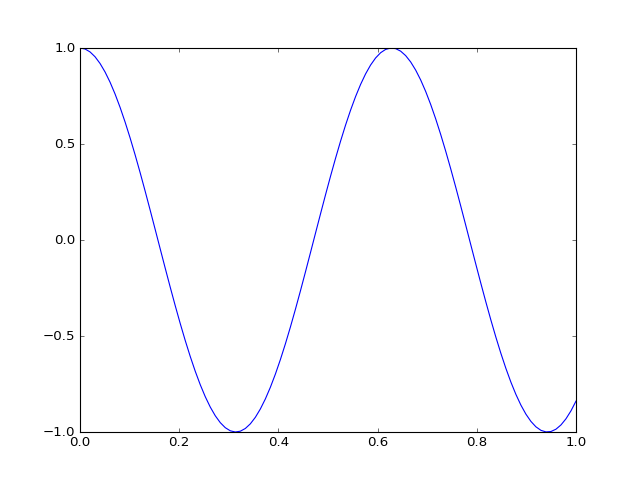

In [3]:
import numpy as np

# generate some data to plot
x = np.linspace(0, 1, 100)
y = np.cos(10 * x)

plt.figure() # starts a new figure
plt.plot(x, y) # plots our data to that figure

### Multi-Line Plots

You can make multiple plots on the same axes by just calling `plt.plot` multiple times.

<IPython.core.display.Javascript object>


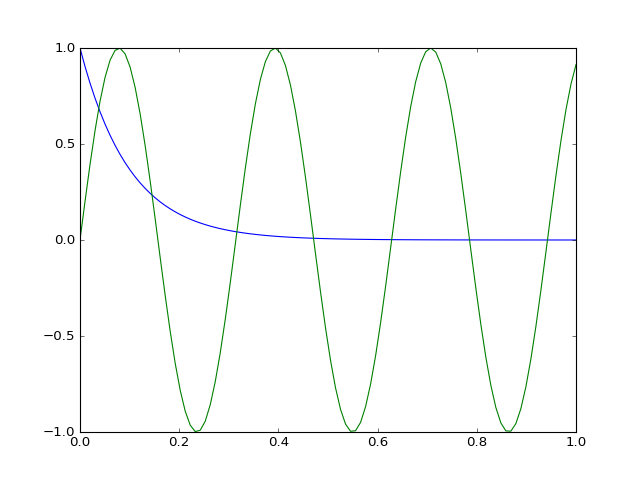

In [4]:
x = np.linspace(0, 1, 100)

y1 = np.exp(-10 * x)
y2 = np.sin(20 * x)

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)

You can also take advantage of the fact that a multi-dimensional "y" array will create separate lines.

The first dimension of the two arrays in the `plot` function have to be the same. Since our "x" array usually has `shape=(N,)`, our "y" array will have `shape=(N, num_lines)` -- each column of `y` is a separate line.

(100,)
(2, 100)


<IPython.core.display.Javascript object>


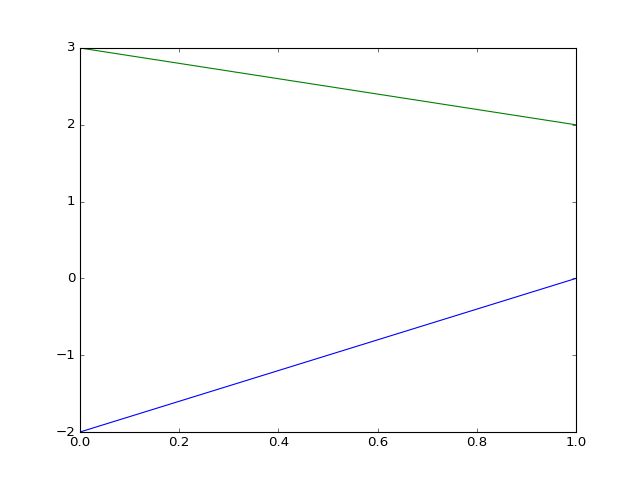

In [5]:
x = np.linspace(0, 1, 100)

# slopes
m = np.array([[2],
              [-1]])
# intercepts
b = np.array([[-2],
              [3]])

y = m * x + b # broadcasting!

print(x.shape)
print(y.shape)
y = np.transpose(y) # need to transpose so each column is a line

plt.figure()
plt.plot(x, y)

### Line properties

You have control over many of the properties of line plots like line width, color, style, etc. Specify these options with keyword arguments.

<IPython.core.display.Javascript object>


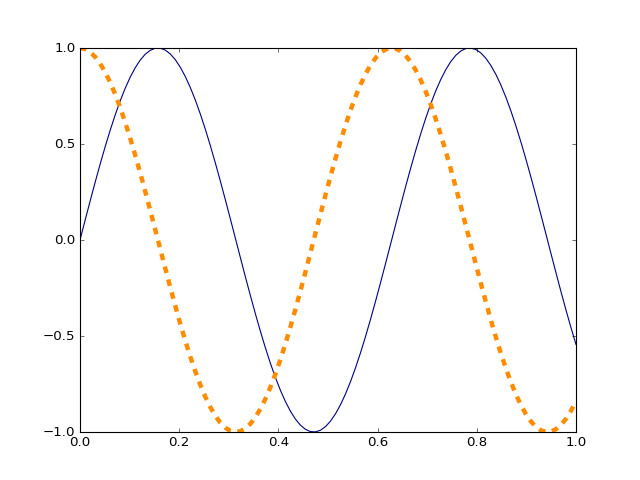

In [6]:
x = np.linspace(0, 1, 100)

ysin = np.sin(10 * x)
ycos = np.cos(10 * x)

plt.figure()

# plot the sin with a navy blue line
plt.plot(x, ysin, color='navy')

# plot the cos with a thick dashed orange line
plt.plot(x, ycos, color='darkorange', linewidth=4, linestyle='--')

I'm going to make the cell above into a function so I can demonstrate other plot manipulations easily.

In [7]:
def plot_sin_cos():
    x = np.linspace(0, 1, 100)
    ysin = np.sin(10 * x)
    ycos = np.cos(10 * x)
    plt.plot(x, ysin, color='navy')
    plt.plot(x, ycos, color='darkorange', linewidth=4, linestyle='--')

### Axis Limits

matplotlib will set axis limits to fit the contents. You can override those.

<IPython.core.display.Javascript object>


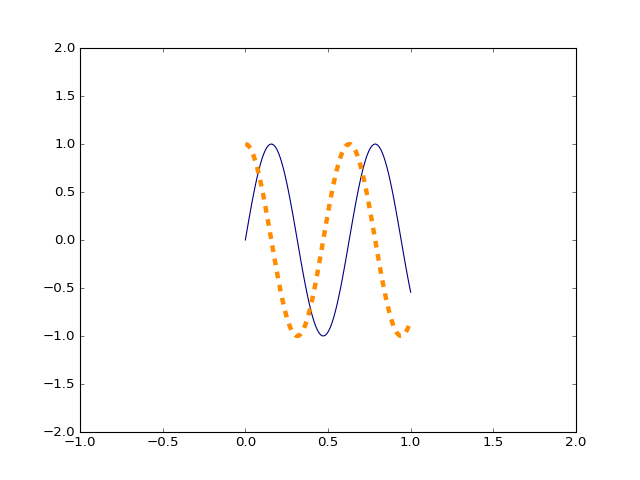

(-2, 2)

In [8]:
plt.figure()
plot_sin_cos() # using my plot function here

plt.xlim(-1, 2)
plt.ylim(-2, 2)

### Axis Labels

You should always provide axis labels so people know what you're plotting.

<IPython.core.display.Javascript object>


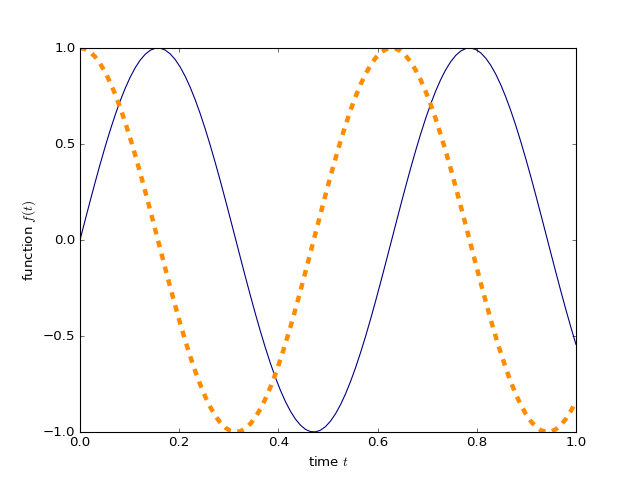

In [9]:
plt.figure()
plot_sin_cos()

plt.xlabel('time $t$') # dollar signs allow you to write latex
plt.ylabel('function $f(t)$')

### Adding a Legend

Legends are important when you have more than one line on a plot.

You can specify the names that should show up in the legend in two ways.

<IPython.core.display.Javascript object>


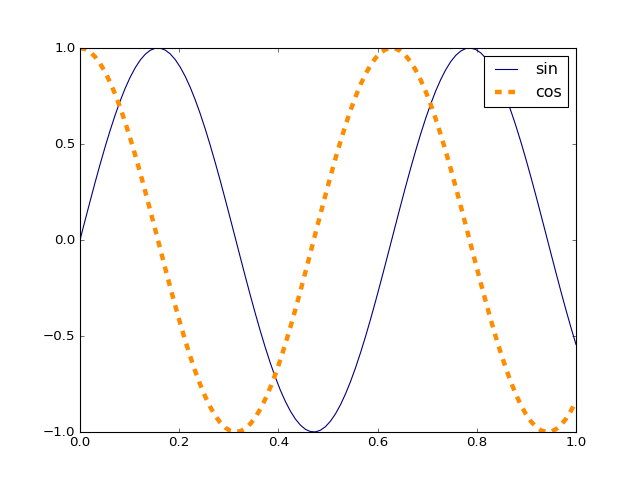

In [10]:
plt.figure()
plot_sin_cos()

plt.legend(['sin', 'cos']) # provide the names as a list

You can instead specify the name of each line as you plot it with the `label` keyword argument.

<IPython.core.display.Javascript object>


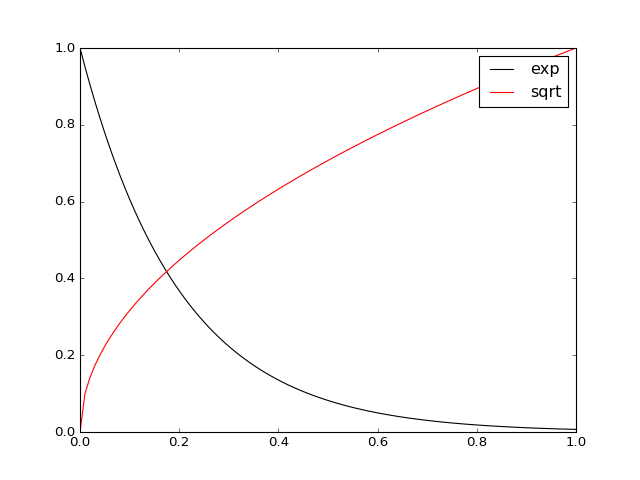

In [11]:
plt.figure()

x = np.linspace(0, 1, 100)
y1 = np.exp(-5 * x)
y2 = np.sqrt(x)

# label the first line 'exp'
plt.plot(x, y1, color='black', label='exp')
# label the second line 'sqrt'
plt.plot(x, y2, color='red', label='sqrt')

# can now call legend without specifying the names
plt.legend()

## Subplots

In a notebook, you'll probably most often just generate separate figures for everything. But subplots are still useful to know about for scripting and creating compact figures.

<IPython.core.display.Javascript object>


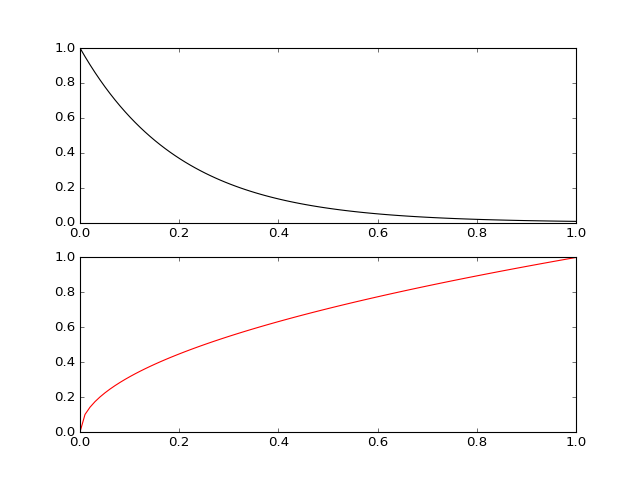

In [12]:
# using x and y1/y2 from above

plt.figure() # single figure

plt.subplot(2, 1, 1) # this is just like matlab's subplot (num_rows, num_cols, plot_number)
plt.plot(x, y1, color='black')

plt.subplot(2, 1, 2)
plt.plot(x, y2, color='red')

## Interactive Plots

You can write functions to generate plots with variable parameters and interactively manipulate them.

<function __main__.plot_exp>

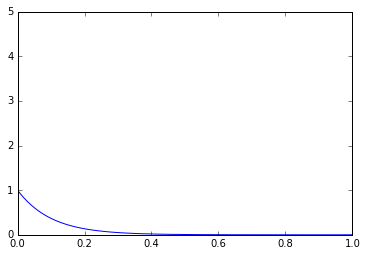

In [13]:
 # need to use `inline` instead of `notebook` for interact to work
%matplotlib inline

# ipywidgets provides the interact function
from ipywidgets import interact

plt.figure()

def plot_exp(init=1, decay=10):
    x = np.linspace(0, 1, 100)
    y = init * np.exp(-decay * x)
    
    plt.plot(x, y)
    plt.ylim(0, 5)
    
# interact takes:
# our function name (note: we do not *call* the function)
# the parameters of our plot and their ranges
interact(plot_exp, init=(0, 5, 0.1), decay=(0, 20, 1))